# Data Preparation

## Load Dataset

In [3]:
import pandas as pd
import numpy as np

df = pd.read_csv("CO2 Emissions.csv")

print("Original Dataset: \n") 
df.head()

Original Dataset: 



,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


## Dataset Information

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

## Missing Values Detection

In [3]:
missing_values_flag = any(('?' in df[col].values) or ('' in df[col].values) for col in df.columns)

print("Missing values:", missing_values_flag)

Missing values: False


/var/folders/fs/xwmx13hj1zl0dnqq_dzt80b00000gn/T/ipykernel_38153/2081177857.py:1: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  missing_values_flag = any(('?' in df[col].values) or ('' in df[col].values) for col in df.columns)


## Null Values Detection

In [4]:
null_values_flag = df.isnull().values.any()

print("Actual null values:", null_values_flag)

Actual null values: False


## Columns Removal & Rename

In [5]:
print("\nColumn names:")
print(df.columns)


Column names:
Index(['Make', 'Model', 'Vehicle Class', 'Engine Size(L)', 'Cylinders',
       'Transmission', 'Fuel Type', 'Fuel Consumption City (L/100 km)',
       'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)',
       'Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)'],
      dtype='object')


In [6]:
delete_columns = [
    'Fuel Consumption Comb (mpg)'
]

delete_columns = [col for col in delete_columns if col in df.columns]

df.drop(columns=delete_columns, inplace=True)

print("\nDataset after deleting specified columns: \n")
df.head()


Dataset after deleting specified columns: 



,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,244


In [7]:
df.rename(columns = {
    'Make':'Vehicle_Make',
    'Model':'Vehicle_Model',
    'Vehicle Class':'Vehicle_Class',
    'Engine Size(L)':'Engine_Size',
    'Fuel Type':'Fuel_Type',
    'Fuel Consumption City (L/100 km)':'Fuel_Consumption_City',
    'Fuel Consumption Hwy (L/100 km)':'Fuel_Consumption_Highway',
    'Fuel Consumption Comb (L/100 km)':'Fuel_Consumption_Combined',
    'CO2 Emissions(g/km)':'CO2_Emissions',
}, inplace = True)

print("\nDataset after renaming columns: \n")
df.head()


Dataset after renaming columns: 



,Vehicle_Make,Vehicle_Model,Vehicle_Class,Engine_Size,Cylinders,Transmission,Fuel_Type,Fuel_Consumption_City,Fuel_Consumption_Highway,Fuel_Consumption_Combined,CO2_Emissions
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,244


## Breaking down Transmission to Transmission_Type & Gears

In [8]:
# Function to determine transmission type
def get_transmission_type(code):
    if 'M' in code and not 'A' in code:
        return 'Manual'
    elif any(x in code for x in ['A', 'S', 'V']):
        return 'Automatic'
    return 'Unknown'

# Function to extract number of gears
def get_gears(code):
    digits = ''.join(filter(str.isdigit, code))
    return int(digits) if digits else 0  # Default to 0 if no digits found

# Apply functions to create new columns
df['Transmission_Type'] = df['Transmission'].apply(get_transmission_type)
df['Gears'] = df['Transmission'].apply(get_gears)

df.head()

,Vehicle_Make,Vehicle_Model,Vehicle_Class,Engine_Size,Cylinders,Transmission,Fuel_Type,Fuel_Consumption_City,Fuel_Consumption_Highway,Fuel_Consumption_Combined,CO2_Emissions,Transmission_Type,Gears
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,196,Automatic,5
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,221,Manual,6
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,136,Automatic,7
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,255,Automatic,6
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,244,Automatic,6


# Columns Rearrange

In [9]:
df = df[['Vehicle_Make',
          'Vehicle_Model',
          'Vehicle_Class',
          'Engine_Size',
          'Cylinders',
          'Fuel_Type',
          'Fuel_Consumption_City',
          'Fuel_Consumption_Highway',
          'Fuel_Consumption_Combined',
          'Transmission',
          'Transmission_Type',
          'Gears',
          'CO2_Emissions']]

print("\nDataset after rearranging columns: \n")
df.head()


Dataset after rearranging columns: 



,Vehicle_Make,Vehicle_Model,Vehicle_Class,Engine_Size,Cylinders,Fuel_Type,Fuel_Consumption_City,Fuel_Consumption_Highway,Fuel_Consumption_Combined,Transmission,Transmission_Type,Gears,CO2_Emissions
0,ACURA,ILX,COMPACT,2.0,4,Z,9.9,6.7,8.5,AS5,Automatic,5,196
1,ACURA,ILX,COMPACT,2.4,4,Z,11.2,7.7,9.6,M6,Manual,6,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,Z,6.0,5.8,5.9,AV7,Automatic,7,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,Z,12.7,9.1,11.1,AS6,Automatic,6,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,Z,12.1,8.7,10.6,AS6,Automatic,6,244


## Cleaned Dataset Saved

In [10]:
file_path = "Cleaned CO2 Emissions.csv"

df.to_csv(file_path, index=False)

print("Cleaned dataset saved successfully to:", file_path)

Cleaned dataset saved successfully to: Cleaned CO2 Emissions.csv


# Exploratory Data Analysis

## Statistics of Continuous Variables

In [11]:
df.describe()

,Engine_Size,Cylinders,Fuel_Consumption_City,Fuel_Consumption_Highway,Fuel_Consumption_Combined,Gears,CO2_Emissions
count,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000
mean,3.160068,5.615030,12.556534,9.041706,10.975071,6.611510,250.584699
std,1.354170,1.828307,3.500274,2.224456,2.892506,1.795264,58.512679
min,0.900000,3.000000,4.200000,4.000000,4.100000,0.000000,96.000000
25%,2.000000,4.000000,10.100000,7.500000,8.900000,6.000000,208.000000
50%,3.000000,6.000000,12.100000,8.700000,10.600000,6.000000,246.000000
75%,3.700000,6.000000,14.600000,10.200000,12.600000,8.000000,288.000000
max,8.400000,16.000000,30.600000,20.600000,26.100000,10.000000,522.000000


## Statistics of Continuous & Categorical Variables

In [12]:
df.describe(include='all')

,Vehicle_Make,Vehicle_Model,Vehicle_Class,Engine_Size,Cylinders,Fuel_Type,Fuel_Consumption_City,Fuel_Consumption_Highway,Fuel_Consumption_Combined,Transmission,Transmission_Type,Gears,CO2_Emissions
count,7385,7385,7385,7385.000000,7385.000000,7385,7385.000000,7385.000000,7385.000000,7385,7385,7385.000000,7385.000000
unique,42,2053,16,NaN,NaN,5,NaN,NaN,NaN,27,2,NaN,NaN
top,FORD,F-150 FFV 4X4,SUV - SMALL,NaN,NaN,X,NaN,NaN,NaN,AS6,Automatic,NaN,NaN
freq,628,32,1217,NaN,NaN,3637,NaN,NaN,NaN,1324,6200,NaN,NaN
mean,NaN,NaN,NaN,3.160068,5.615030,NaN,12.556534,9.041706,10.975071,NaN,NaN,6.611510,250.584699
std,NaN,NaN,NaN,1.354170,1.828307,NaN,3.500274,2.224456,2.892506,NaN,NaN,1.795264,58.512679
min,NaN,NaN,NaN,0.900000,3.000000,NaN,4.200000,4.000000,4.100000,NaN,NaN,0.000000,96.000000
25%,NaN,NaN,NaN,2.000000,4.000000,NaN,10.100000,7.500000,8.900000,NaN,NaN,6.000000,208.000000
50%,NaN,NaN,NaN,3.000000,6.000000,NaN,12.100000,8.700000,10.600000,NaN,NaN,6.000000,246.000000
75%,NaN,NaN,NaN,3.700000,6.000000,NaN,14.600000,10.200000,12.600000,NaN,NaN,8.000000,288.000000


## Visualizations

### Outliers 

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

num_feat = ['Engine_Size', 'Cylinders', 'Fuel_Consumption_City',
            'Fuel_Consumption_Highway','Fuel_Consumption_Combined', 
            'Gears','CO2_Emissions']
cat_feat = ['Vehicle_Make', 'Vehicle_Model', 'Vehicle_Class', 
            'Transmission','Transmission_Type', 'Fuel_Type']

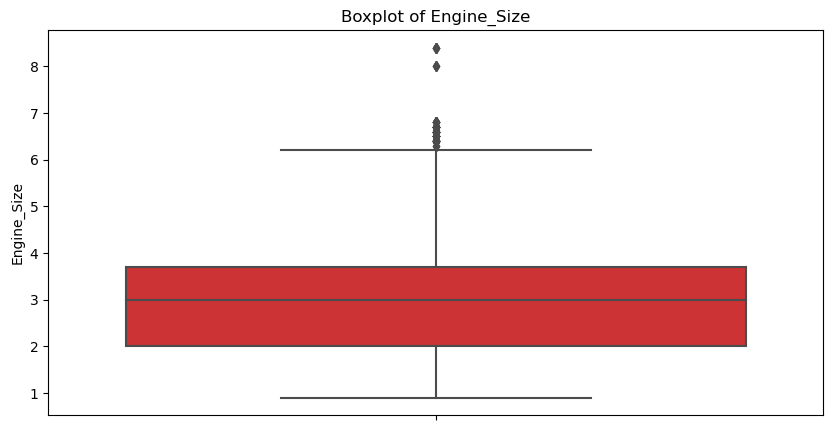

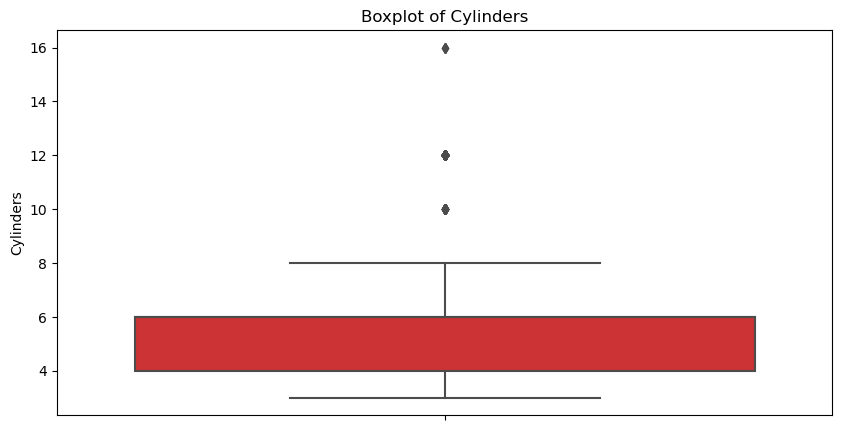

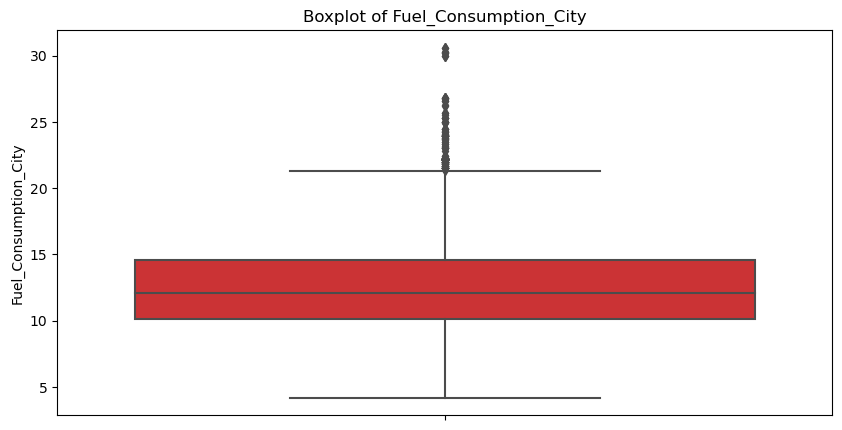

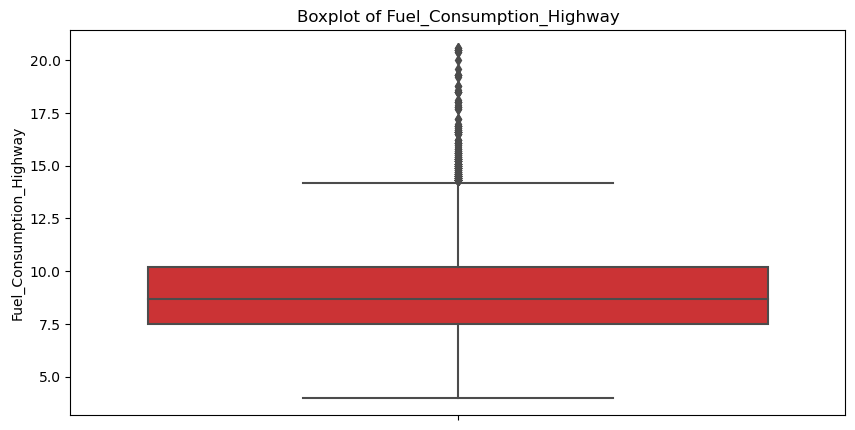

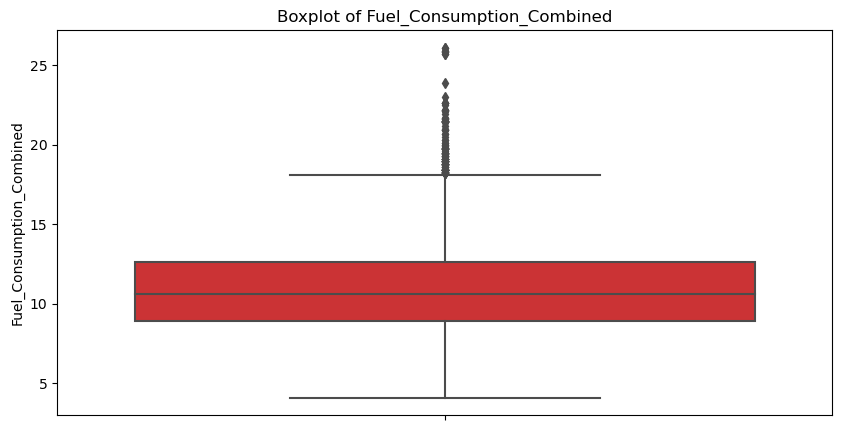

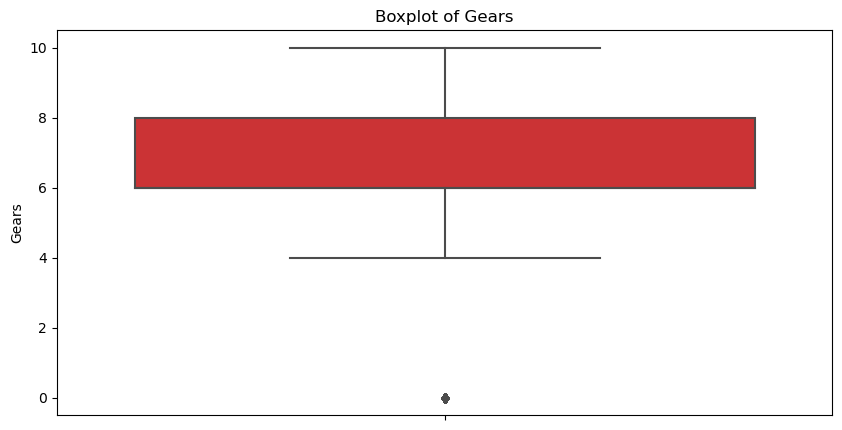

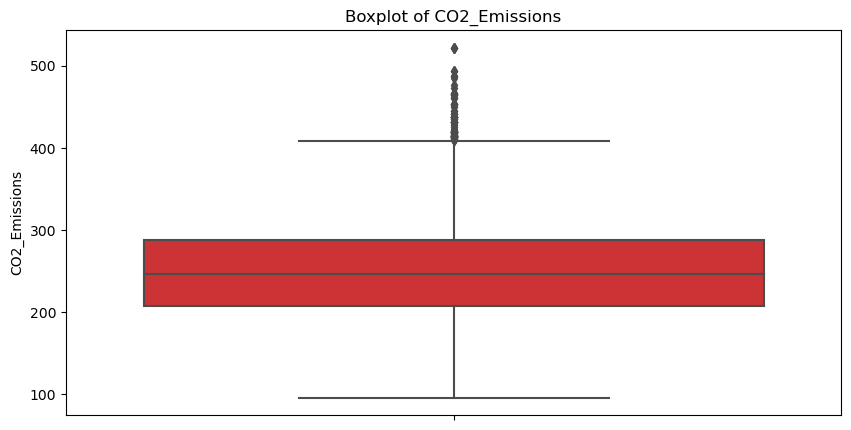

In [15]:
for num in num_feat:
    plt.figure(figsize=(10, 5))
    sns.boxplot(data=df, y=num, palette='Set1')
    plt.title(f'Boxplot of {num}')
    plt.show()

### Univariate Analysis 

### Categorical 

Vehicle_Make:
               Sample  Percent
Vehicle_Make                  
FORD              628      8.5
CHEVROLET         588      8.0
BMW               527      7.1
MERCEDES-BENZ     419      5.7
PORSCHE           376      5.1
TOYOTA            330      4.5
GMC               328      4.4
AUDI              286      3.9
NISSAN            259      3.5
JEEP              251      3.4
DODGE             246      3.3
KIA               231      3.1
HONDA             214      2.9
HYUNDAI           210      2.8
MINI              204      2.8
VOLKSWAGEN        197      2.7
MAZDA             180      2.4
LEXUS             178      2.4
JAGUAR            160      2.2
CADILLAC          158      2.1
SUBARU            140      1.9
VOLVO             124      1.7
INFINITI          108      1.5
BUICK             103      1.4
RAM                97      1.3
LINCOLN            96      1.3
MITSUBISHI         95      1.3
CHRYSLER           88      1.2
LAND ROVER         85      1.2
FIAT               73    

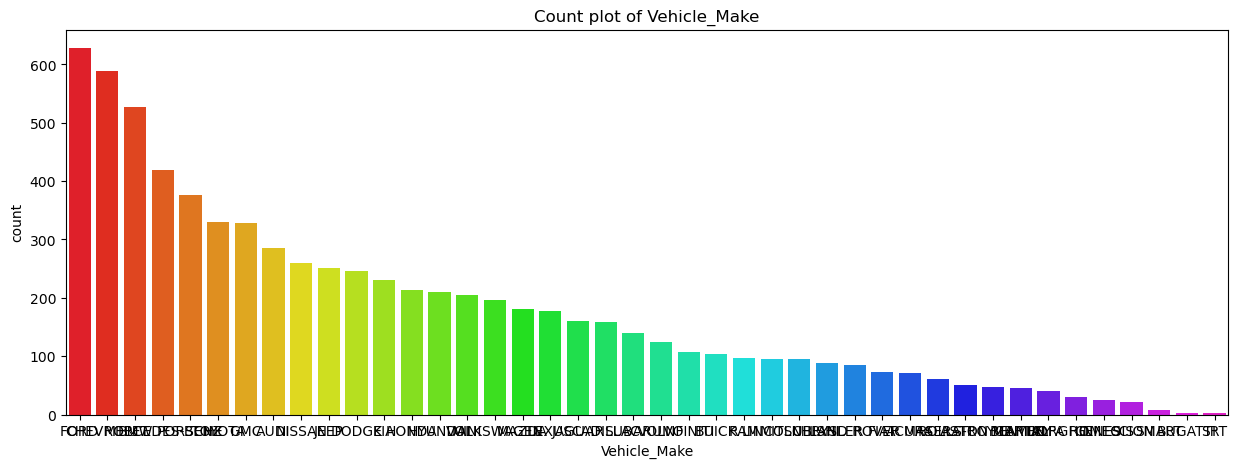

Vehicle_Model:
                      Sample  Percent
Vehicle_Model                        
F-150 FFV 4X4             32      0.4
F-150 FFV                 32      0.4
MUSTANG                   27      0.4
FOCUS FFV                 24      0.3
SONIC                     20      0.3
...                      ...      ...
AVENTADOR S ROADSTER       1      0.0
HURACAN AWD                1      0.0
HURACAN SPYDER AWD         1      0.0
LS 500                     1      0.0
XC40 T4 AWD                1      0.0

[2053 rows x 2 columns]


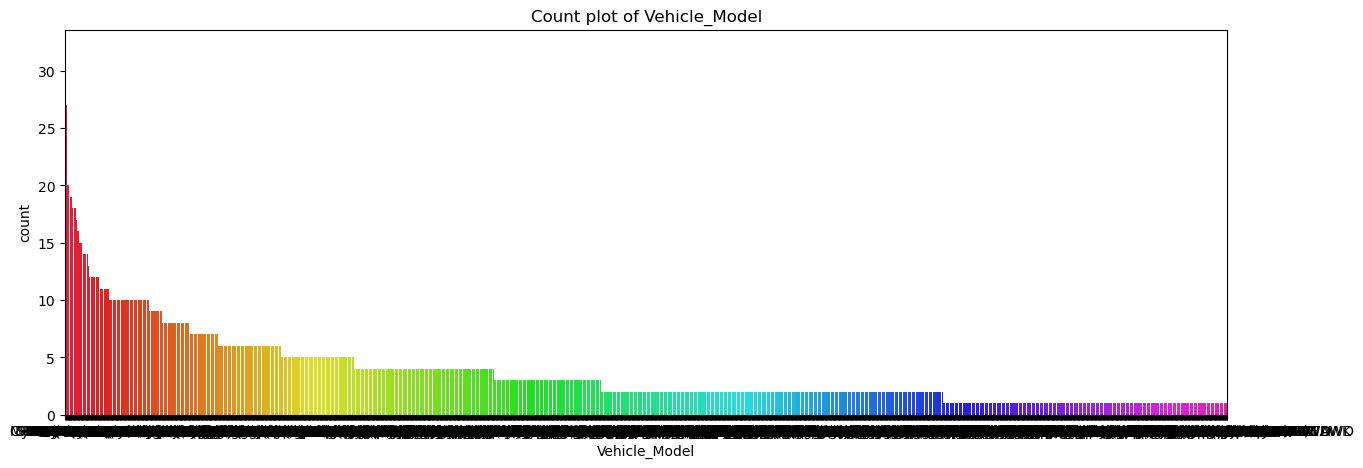

Vehicle_Class:
                          Sample  Percent
Vehicle_Class                            
SUV - SMALL                 1217     16.5
MID-SIZE                    1133     15.3
COMPACT                     1022     13.8
SUV - STANDARD               735     10.0
FULL-SIZE                    639      8.7
SUBCOMPACT                   606      8.2
PICKUP TRUCK - STANDARD      538      7.3
TWO-SEATER                   460      6.2
MINICOMPACT                  326      4.4
STATION WAGON - SMALL        252      3.4
PICKUP TRUCK - SMALL         159      2.2
MINIVAN                       80      1.1
SPECIAL PURPOSE VEHICLE       77      1.0
VAN - PASSENGER               66      0.9
STATION WAGON - MID-SIZE      53      0.7
VAN - CARGO                   22      0.3


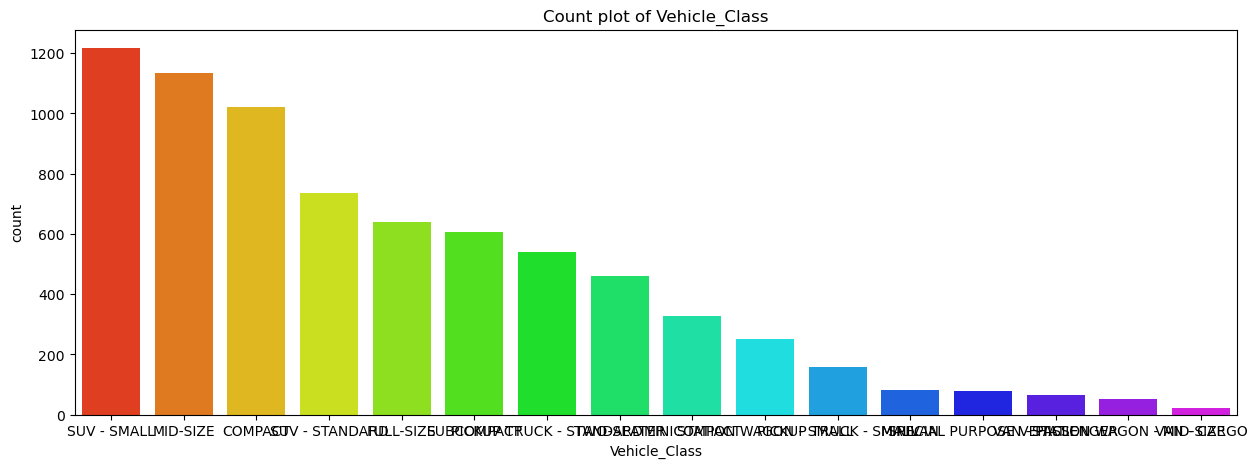

Transmission:
              Sample  Percent
Transmission                 
AS6             1324     17.9
AS8             1211     16.4
M6               901     12.2
A6               789     10.7
A8               490      6.6
AM7              445      6.0
A9               339      4.6
AS7              319      4.3
AV               295      4.0
M5               193      2.6
AS10             168      2.3
AM6              132      1.8
AV7              118      1.6
AV6              113      1.5
M7                91      1.2
A5                84      1.1
AS9               77      1.0
A4                65      0.9
AM8               62      0.8
A7                53      0.7
AV8               39      0.5
A10               31      0.4
AS5               26      0.4
AV10              11      0.1
AM5                4      0.1
AM9                3      0.0
AS4                2      0.0


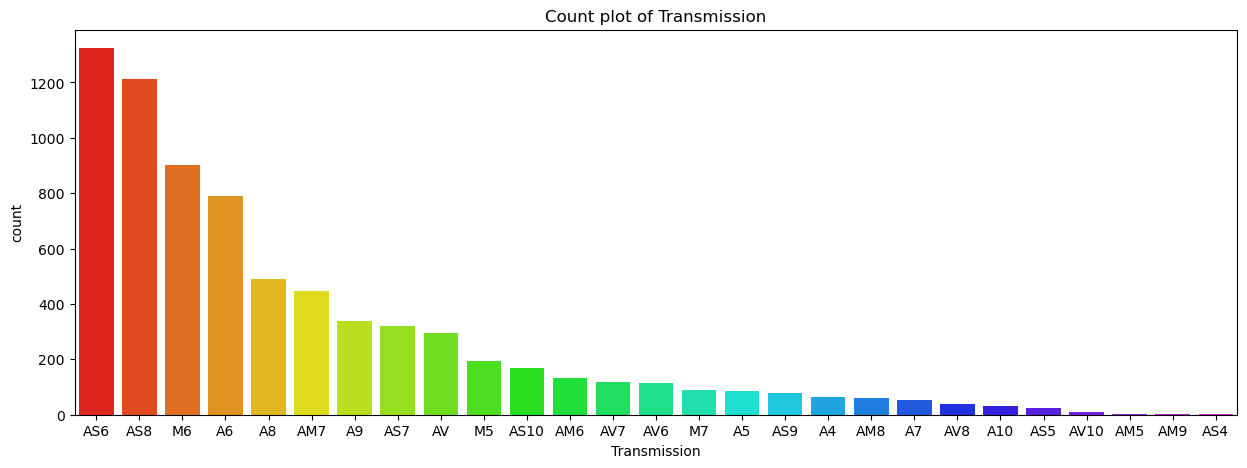

Transmission_Type:
                   Sample  Percent
Transmission_Type                 
Automatic            6200     84.0
Manual               1185     16.0


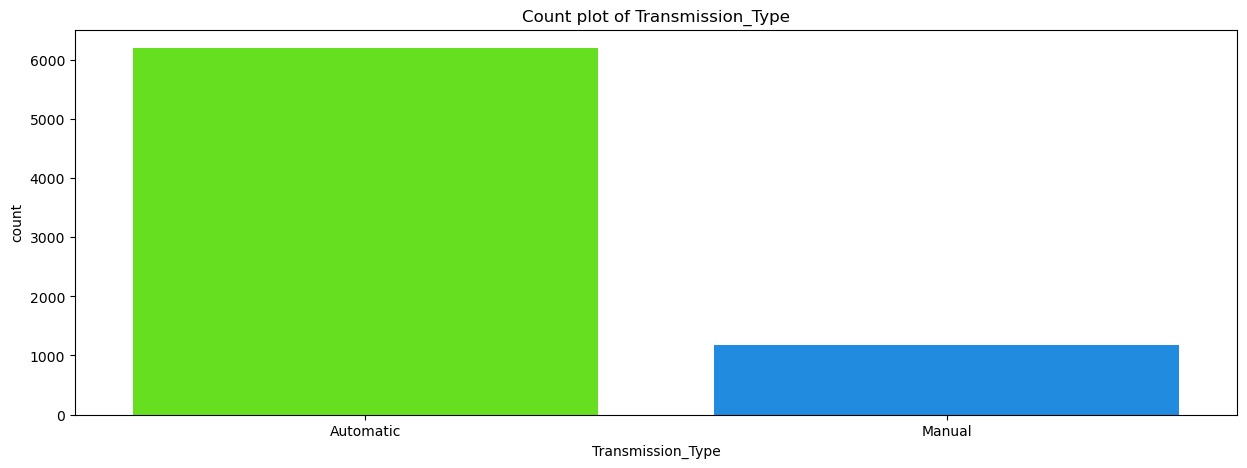

Fuel_Type:
           Sample  Percent
Fuel_Type                 
X            3637     49.2
Z            3202     43.4
E             370      5.0
D             175      2.4
N               1      0.0


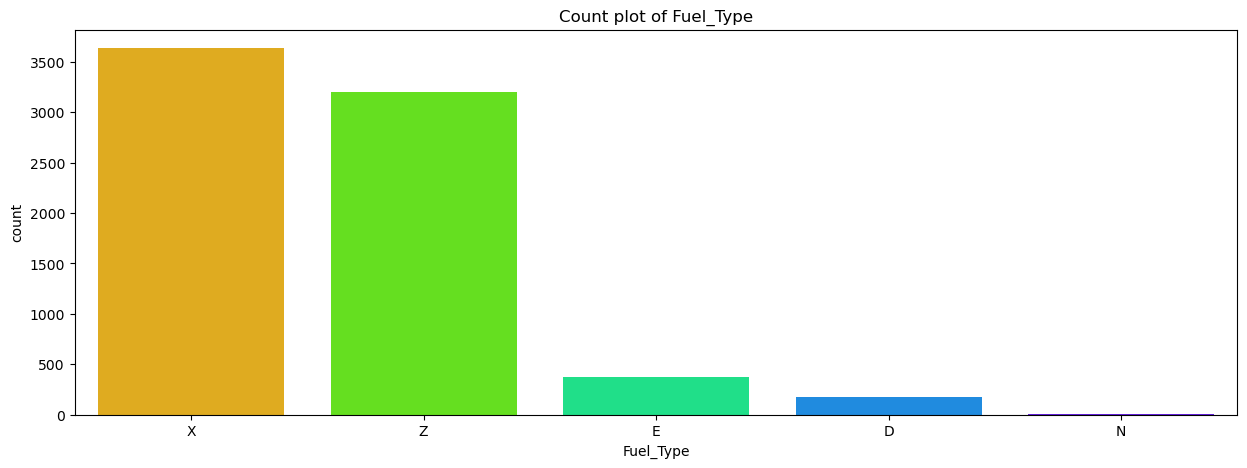

In [16]:
for feature in cat_feat:

    if feature in df.columns:

        count = df[feature].value_counts()
        percent = 100 * df[feature].value_counts(normalize=True)

        data = pd.DataFrame({'Sample': count, 'Percent': percent.round(1)})

        print(f"{feature}:")
        print(data)

        plt.figure(figsize=(15, 5))
        sns.countplot(x=feature, data=df, palette='gist_rainbow', order=df[feature].value_counts().index)
        plt.title(f'Count plot of {feature}')
        plt.show()
    else:
        print(f"The feature '{feature}' is not present in the DataFrame.")


### Numerical 

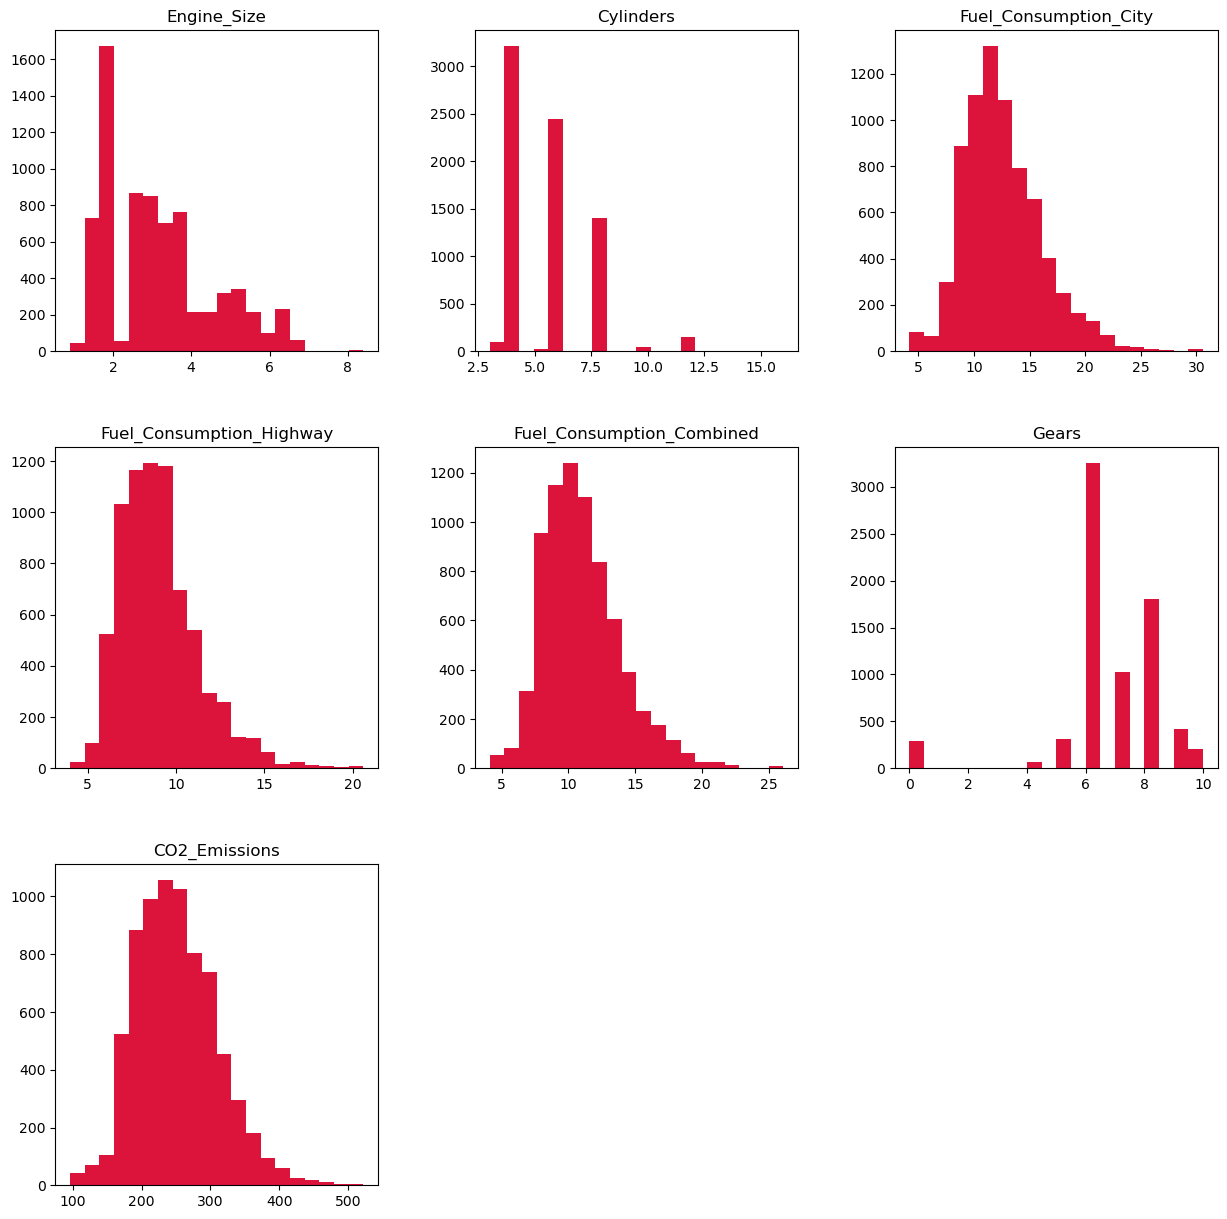

In [17]:
df.hist(bins = 20, figsize = (15, 15), color = "crimson", grid = False)
plt.show()

### Multivariate Analysis

### Categorical 

/Users/uniten/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/uniten/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/uniten/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/uniten/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/uniten/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/uniten/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to t

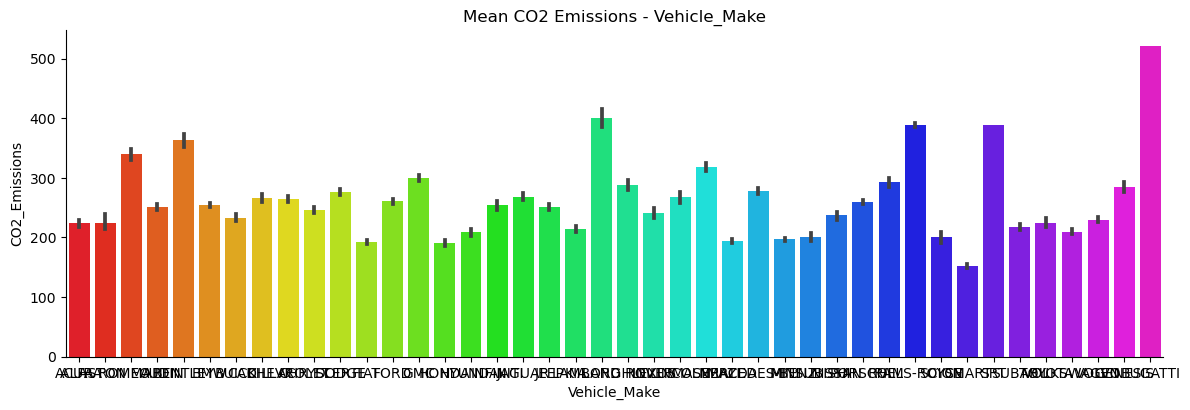

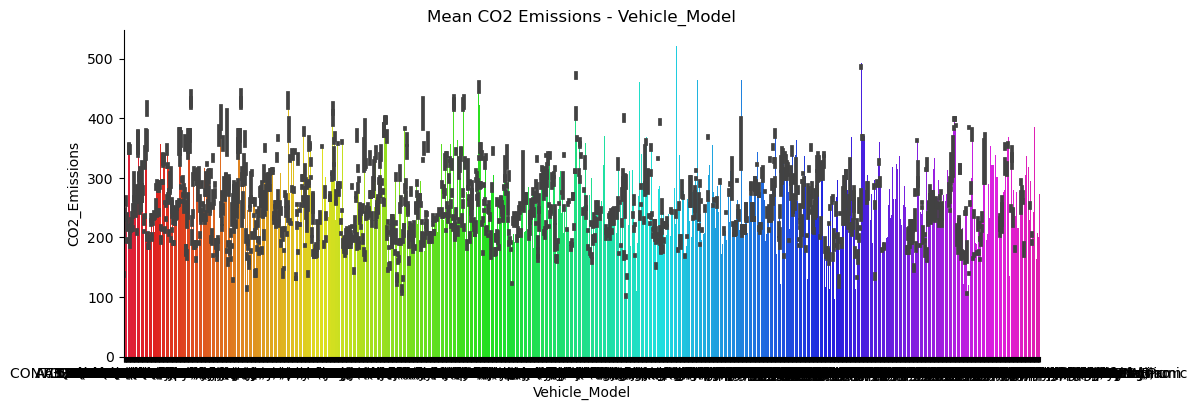

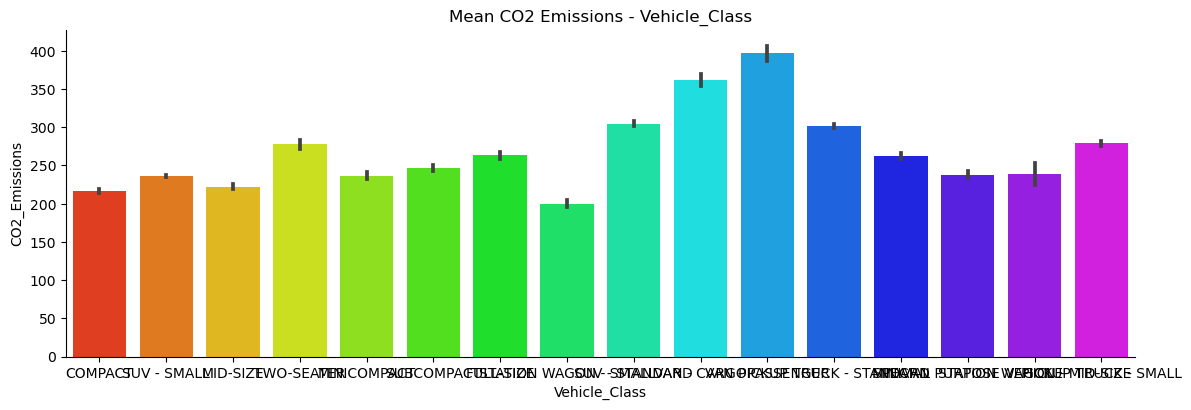

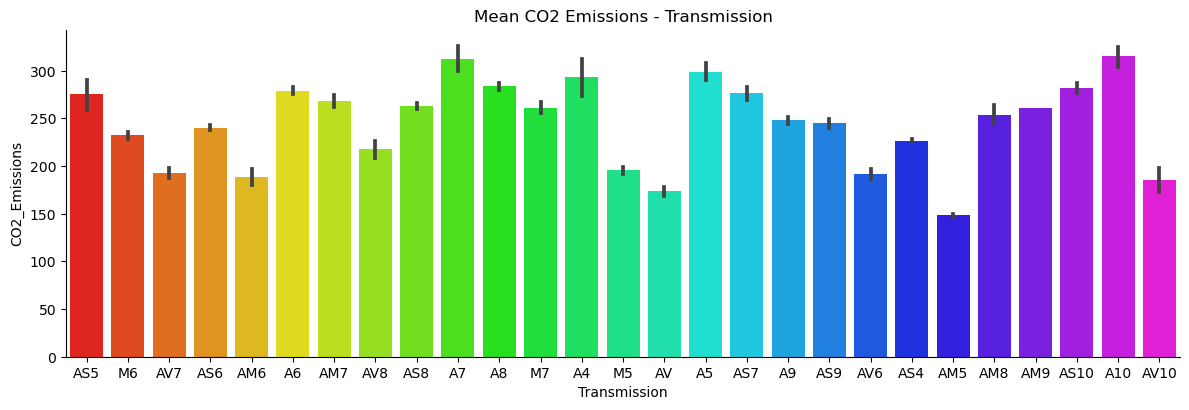

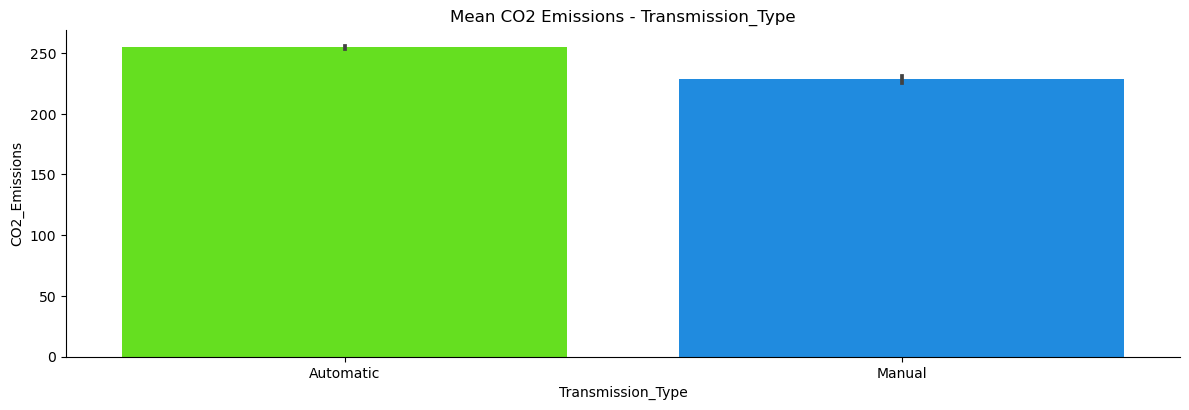

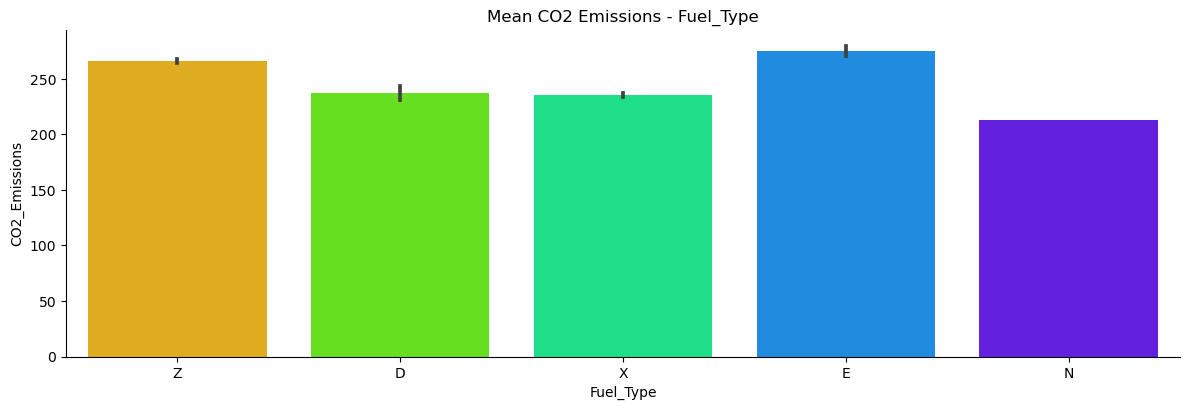

In [18]:
categorical = df.select_dtypes(include = 'object').columns.to_list()

for col in cat_feat :
    sns.catplot(x = col, 
              y = 'CO2_Emissions', 
              kind = 'bar', 
              dodge = False, 
              height = 4, 
              aspect = 3, 
              data = df, 
              palette = 'gist_rainbow')
  
    plt.title("Mean CO2 Emissions - {}".format(col))

### Numerical 

/Users/uniten/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


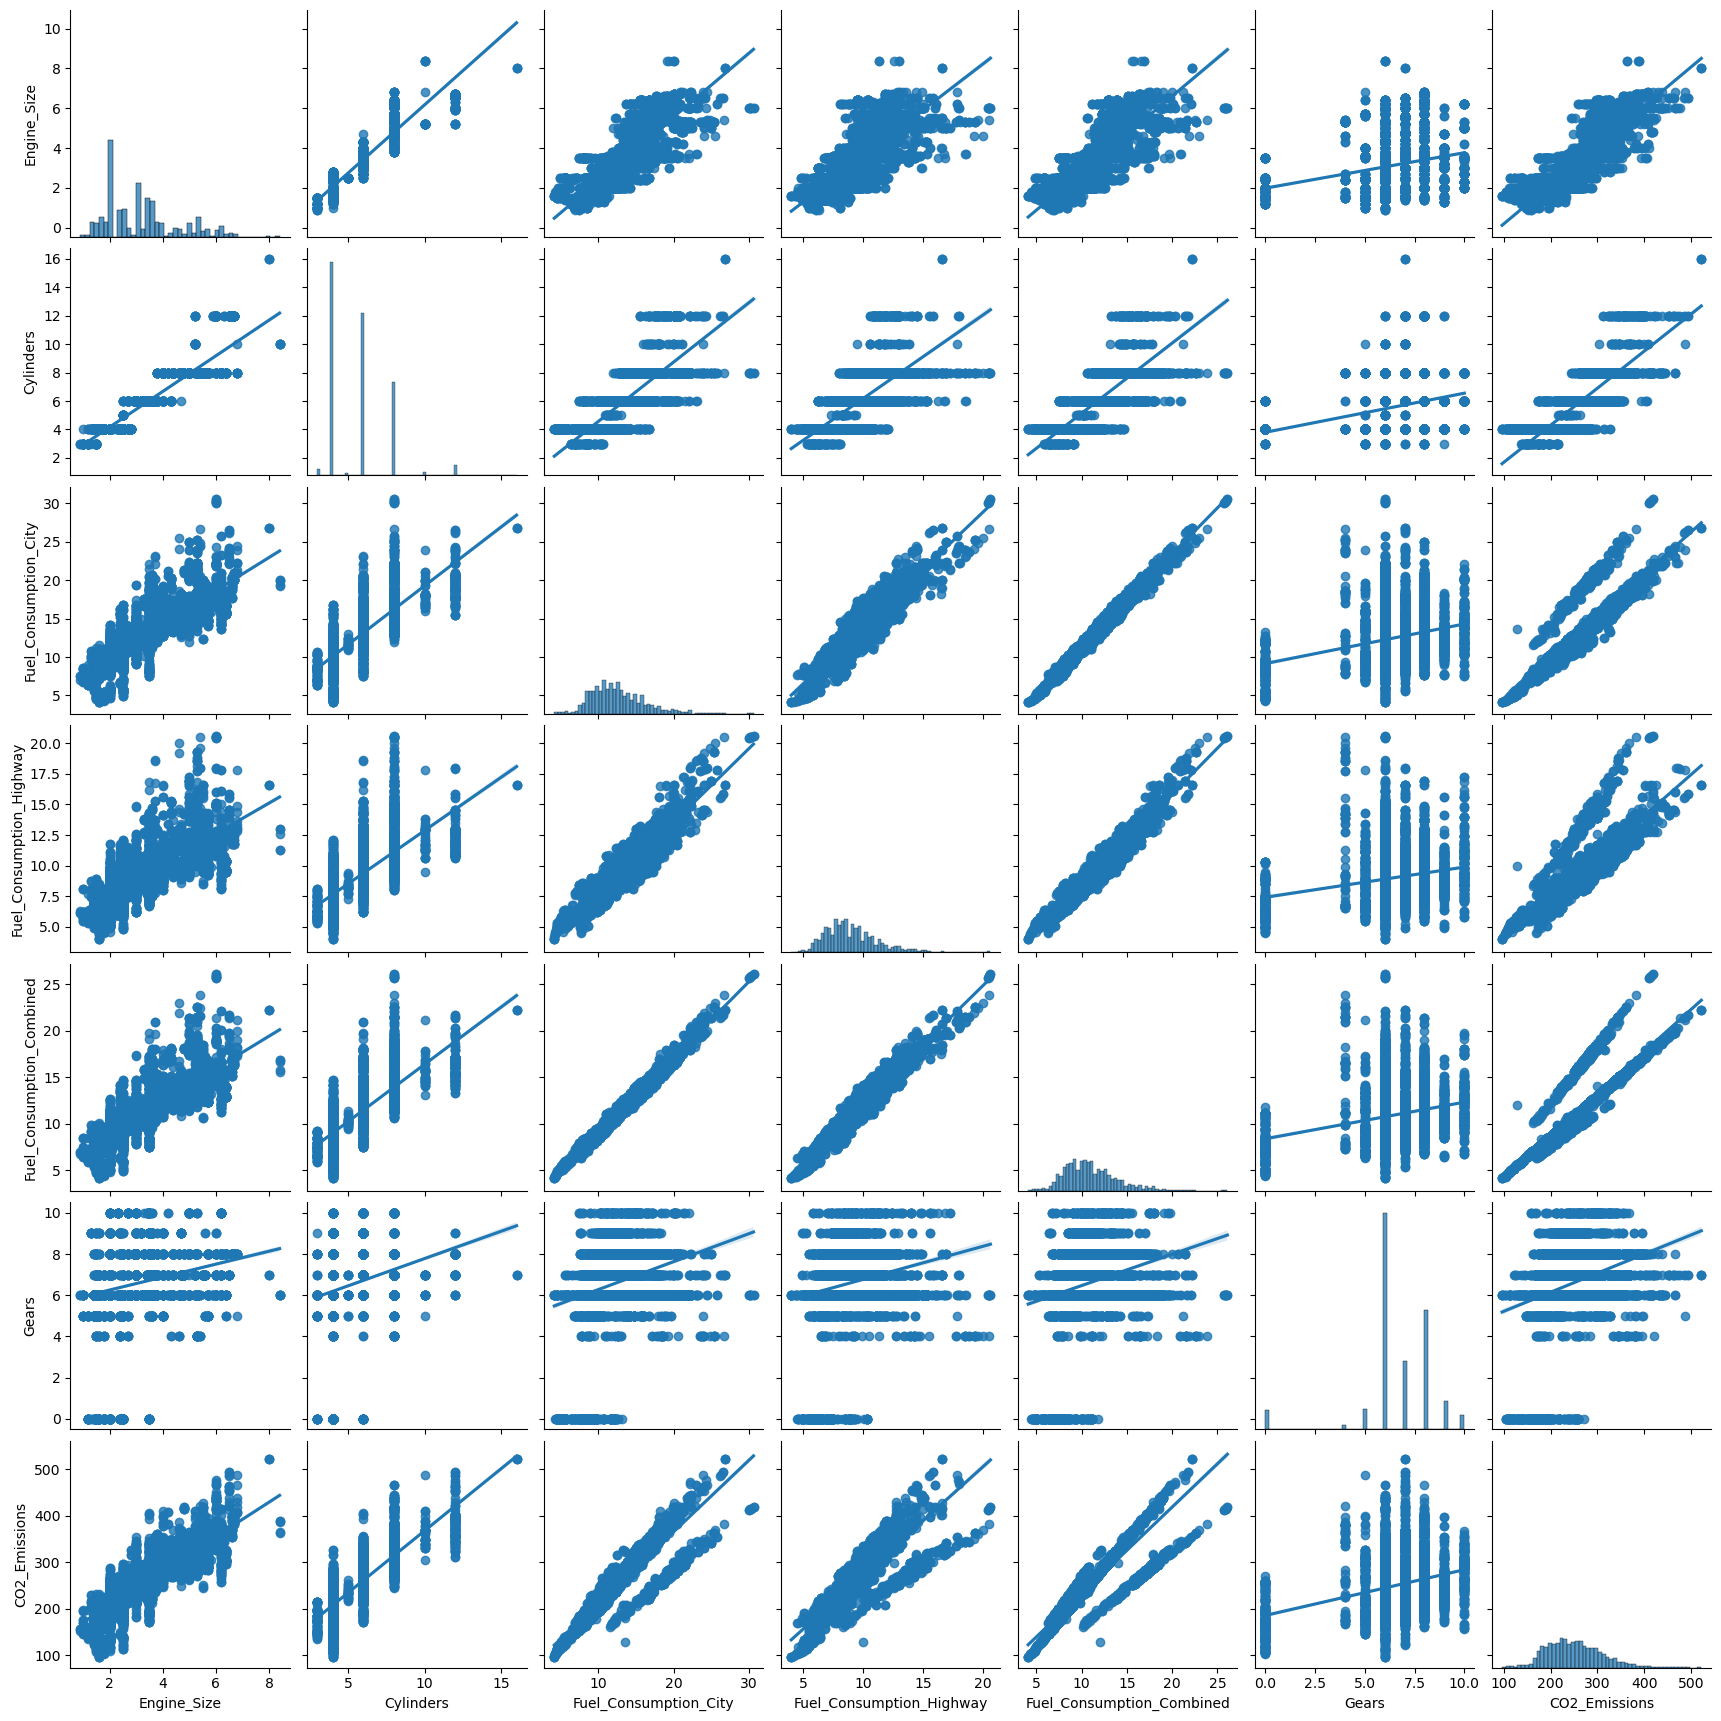

In [19]:
sns.pairplot(df, kind="reg")
plt.show()

### Correlation Score 

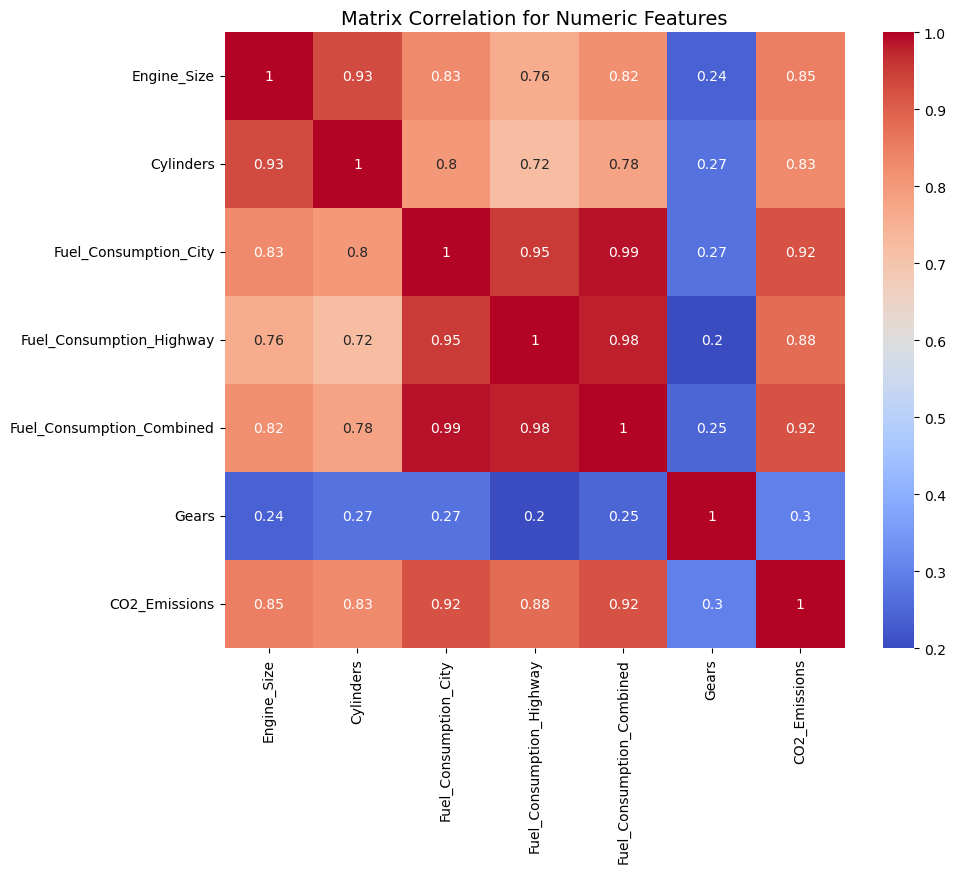

In [20]:
plt.figure(figsize=(10, 8))

numeric_df = df[num_feat]

correlation_matrix = numeric_df.corr().round(2)

sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm')

plt.title("Matrix Correlation for Numeric Features", size=14)
plt.show()